In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [741]:
class LongestCommonSubsequence():
    def __init__(self,*args,**kwargs):
        # Set default parameters
        self.L1 = 10
        self.L2 = 10
        self.replace = {0:'A', 1:'B', 2:'C', 3:'D'}
        self.Seq1 = np.array([])
        self.Seq2 = np.array([])
        # Update with provided parameters
        self.__dict__.update(kwargs)
        # Actual initialization
        if not self.Seq1.size:
            self.Seq1 = np.array(pd.Series(np.floor(4*np.random.rand(self.L1))).map(self.replace))
            self.Seq2 = np.array(pd.Series(np.floor(4*np.random.rand(self.L2))).map(self.replace))
        self.L1 = (len(self.Seq1))
        self.L2 = (len(self.Seq2))
        self.Score = np.zeros((self.L1+1,self.L2+1))
        self.Moves = {}
        
            
    def run(self):
        # Fill first column
        for i in range(0,self.L1):
            self.Score[i,0] = 0
            self.Moves[str(i) + ',0'] = i*['Nord']
        # Fill first row
        for j in range(0,self.L2):
            self.Score[0,j] = 0
            self.Moves['0,' + str(j)] = j*['East']
        # Iteratively fill the Score Matrix; save moves that maximize score to all vertexes
        for i in range(1,self.L1+1):
            for j in range(1,self.L2+1):
                match = (self.Seq1[i-1]==self.Seq2[j-1])
                max_score = max(self.Score[i-1,j],self.Score[i,j-1],match*(self.Score[i-1,j-1]+1))
                if max_score == self.Score[i-1,j]:
                    self.Moves[str(i) + ',' + str(j)] = self.Moves[str(i-1) + ',' + str(j)] + ['Nord']
                elif max_score == self.Score[i,j-1]:
                    self.Moves[str(i) + ',' + str(j)] = self.Moves[str(i) + ',' + str(j-1)] + ['East']    
                elif max_score == match*(self.Score[i-1,j-1]+1):
                    self.Moves[str(i) + ',' + str(j)] = self.Moves[str(i-1) + ',' + str(j-1)] + ['Diag']
                self.Score[i,j] = max_score
    
    def visualize(self):
        fig,ax = plt.subplots(figsize=(self.L2+1,self.L1+1))
        # Plain grid plot
        x,y = np.meshgrid(np.arange(self.L2+1),np.arange(self.L1+1))
        ax.plot(x,y,'o',markersize=5,color='black')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        for xpos in np.unique(x)[:-1]:
            ax.text(xpos+0.5,-0.5,self.Seq2[xpos])
        for ypos in np.unique(y)[:-1]:
            ax.text(-0.5,ypos+0.5,self.Seq1[ypos])
        # Steps and scores
        for key in self.Moves.keys():
            try:
                if self.Moves[key][-1] == 'Diag':
                    ystart = int(key.split(',')[0])
                    xstart = int(key.split(',')[1])
                    ax.arrow(xstart-0.9,ystart-0.9,0.8,0.8,width=0.02,head_width=0.2,length_includes_head=True,
                             color='lightblue')
                    ax.text(xstart-0.5,ystart-0.5,'+1')
            except:
                pass
        return ax

In [742]:
CustomSeq1 = 'TGCA'
CustomSeq2 = 'TGCA'

In [743]:
LCS = LongestCommonSubsequence(Seq1=np.array(list(CustomSeq1)),Seq2=np.array(list(CustomSeq2)))

In [744]:
LCS.run()

In [745]:
LCS.Score

array([[0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1.],
       [0., 1., 2., 2., 2.],
       [0., 1., 2., 3., 3.],
       [0., 1., 2., 3., 4.]])

In [746]:
LCS.Moves[list(LCS.Moves.keys())[-1]]

['Diag', 'Diag', 'Diag', 'Diag']

<AxesSubplot:>

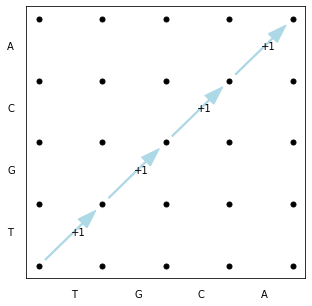

In [747]:
LCS.visualize()

In [748]:
CustomSeq1 = 'ATCTGAT'
CustomSeq2 = 'TGCATA'

In [749]:
LCS2 = LongestCommonSubsequence(Seq1=np.array(list(CustomSeq1)),Seq2=np.array(list(CustomSeq2)))

In [750]:
LCS2.run()

<AxesSubplot:>

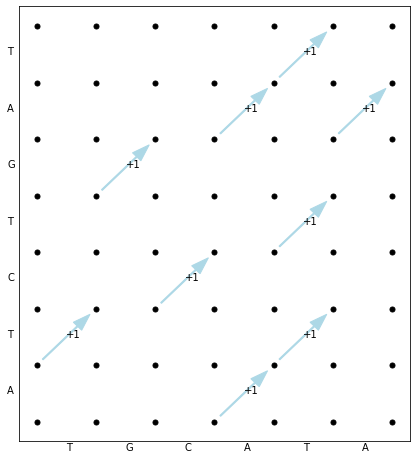

In [751]:
LCS2.visualize()

In [753]:
LCS2.Moves[list(LCS2.Moves.keys())[-1]]

['Nord', 'Diag', 'East', 'Diag', 'East', 'Diag', 'Nord', 'Diag', 'Nord']